In [34]:
import numpy as np
import pandas as pd
import random
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import *
import utils
import os
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import *

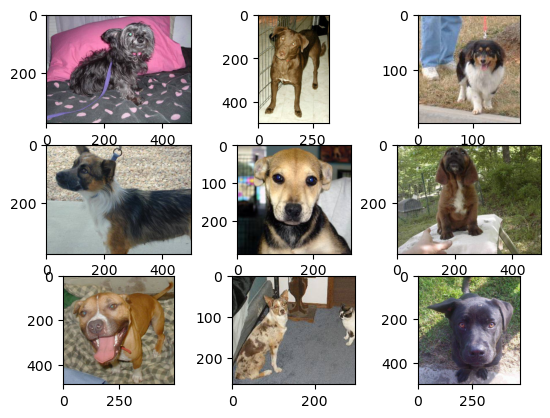

In [13]:
# plot dog photos from the dogs vs cats dataset
# define location of dataset
folder = 'train/dogs/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [11]:
#Specifying the image
Image_Width=250
Image_Height=250
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [55]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'catdog_data/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
    for file in 'train/cats/':
        if file.startswith('cat'):
            dst = dataset_home + 'train/' + 'cats/'  + file
            copyfile(src, dst)
    for file in 'train/dogs/':
        if file.startswith('dog'):
            dst = dataset_home + 'train/' + 'dogs/'  + file
            copyfile(src, dst)

In [47]:
categories[0]

1

In [38]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 248, 248, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 124, 124, 32)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 batch_normalization_13 (Bat  (None, 122, 122, 64)    

1

In [40]:
# block 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(250, 250, 3)))
model.add(MaxPooling2D((2, 2)))
# block 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
# block 3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

ValueError: Input 0 of layer "conv2d_14" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 2)